In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
assignment_df=pd.read_csv("Walmart_sales.csv")

In [3]:
assignment_df.dropna(inplace=True)
assignment_df['Date'] = pd.to_datetime(assignment_df['Date'])
print(assignment_df.head())

   Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1 2010-05-02    1643690.90             0        42.31       2.572   
1      1 2010-12-02    1641957.44             1        38.51       2.548   
2      1 2010-02-19    1611968.17             0        39.93       2.514   
3      1 2010-02-26    1409727.59             0        46.63       2.561   
4      1 2010-05-03    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106  


<ipython-input-3-31720abc39b8>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  assignment_df['Date'] = pd.to_datetime(assignment_df['Date'])


<ipython-input-7-fbc9b9899051>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = assignment_df.corr()


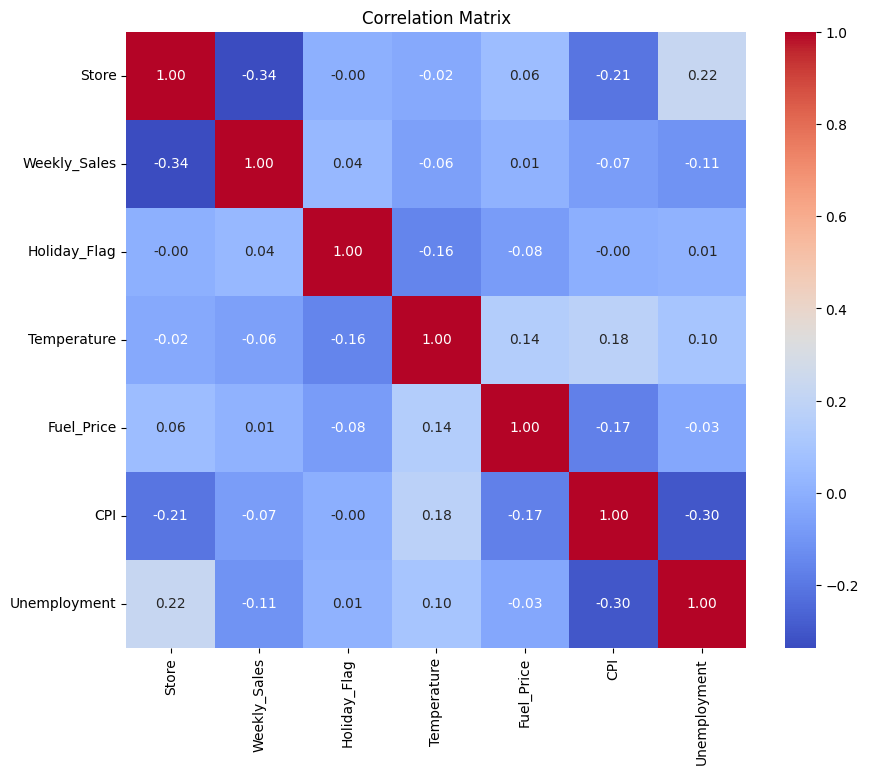

In [7]:
plt.figure(figsize=(10, 8))
corr_matrix = assignment_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [8]:
assignment_df.dropna(inplace=True)

In [9]:
assignment_df['Date'] = pd.to_datetime(assignment_df['Date'])

In [10]:
X = assignment_df.drop(columns=['Weekly_Sales', 'Date'])
y = assignment_df['Weekly_Sales']

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [13]:
param_grid = {
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [15]:
from sklearn.tree import DecisionTreeRegressor

trees = DecisionTreeRegressor(random_state=0)

In [16]:
from sklearn.model_selection import train_test_split, GridSearchCV
grid= GridSearchCV(estimator=trees, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the grid search to the data
grid.fit(X_train, y_train)

# Get the best parameters
best_params = grid.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'max_depth': 9, 'min_samples_leaf': 2, 'min_samples_split': 10}


In [17]:
from sklearn.metrics import mean_squared_error
y_pred = grid.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", rmse)
best_trees = DecisionTreeRegressor(**best_params)
best_trees.fit(X_train, y_train)

Root Mean Squared Error: 161335.57523911924


DecisionTreeRegressor(max_depth=9, min_samples_leaf=2, min_samples_split=10)

In [18]:
best_trees = DecisionTreeRegressor(**best_params)
best_trees.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=9, min_samples_leaf=2, min_samples_split=10)

In [19]:
accuracy = best_trees.score(X_test, y_test)

print("Accuracy:", accuracy)

Accuracy: 0.9169997471849433
